In [6]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/Eurojobs.csv')
data

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


In [13]:
X = data.drop(columns=['Country'])
X

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


In [19]:
model = linkage(X, method='complete')

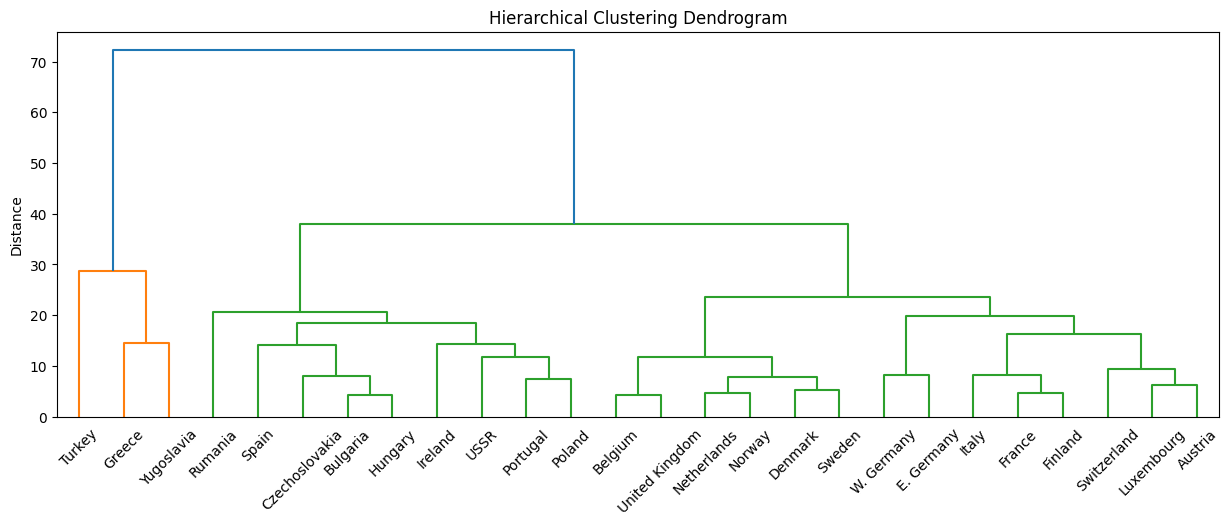

In [21]:
plt.figure(figsize=(15, 5))
dendrogram(model, labels=data['Country'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()